# Ejercicio 1

Realice un programa que encuentre todas las raíces de una función en un intervalo cerrado bajo la suposición de que la función realiza oscilaciones y entre cada oscilación hay al menos una raíz. Ponga en práctica esta función y encuentre todas las raíces de la siguiente función en el intervalo $(0,2\pi)$:

$$
y(x)=\cos x+\frac{6}{5}\sin x^2
$$

In [5]:
from numpy import*
from pylab import*
%matplotlib inline 

In [125]:
def particion(f,inicio,final,h):
    x=arange(inicio,final+h,h)
    y=[x[0]]
    for i in xrange(len(x)-1):
        if f(x[i])*f(x[i+1]) <= 0:
            y=y+[x[i+1]]
        elif f(x[i])*f(x[i+1]) > 0:
            y=y
    return y

In [126]:
def biparticion(f,x_i,x_d,err=1e-5):
    raiz=0.5*(x_i+x_d)
    y_i,y_d=f(x_i),f(x_d)
    while abs(raiz-x_d) >=err and abs(y_i-y_d)>=err:
        y_m=f(raiz)
        if y_m == 0.:
            break
        if y_m*y_i < 0:
            x_d=raiz
        else:
            return x_d
    return raiz

In [127]:
def bi(f,x,h,err=1e-5):
    y=particion(f,x[0],x[1],h)
    raices=[]
    for i in range(len(y)-1):
        r = biparticion(f,y[i],y[i+1],err=1e-5)
        raices.append(r)
        if r > x[1]:
            break
    return raices

Para probar que funcione bi:

In [9]:
def f1(x):
    return cos(x)+(6/5)*sin(x*x)

Sus raices serán:

In [128]:
raices_f1 = bi(f1,[0,2*pi],0.0001)
print(raices_f1)

[1.7277, 2.7277, 2.8534999999999999, 3.6868000000000003, 3.8535000000000004, 4.3798000000000004, 4.6867999999999999, 4.9860000000000007, 5.3798000000000004, 5.5315000000000003, 5.9860000000000007, 6.0316000000000001]


Entonces: la gráfica cruza a x=0 en :

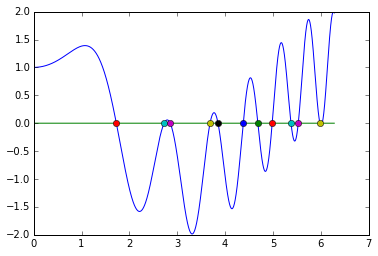

In [129]:
x=arange(0,2*pi+0.001,0.001)
plot(x,cos(x)+(6/5)*sin(x*x))
plot(x,0*x)
for j in xrange(len(raices_f1)-1):
    plot(raices_f1[j],0,'o')
show()

# Ejercicio 2

Se tiene la siguiente función:

$$
f(x,y)=2 e^{-(x+1)^2} (e^{-(y+2)^2}+e^{-(y-2)^2}) + 6 x (x^2+y^2) \ e^{-(x^2+y^2)} -1
$$

Encuentre los puntos $({x_o},{y_o})$ tales que $f(x_o,y_o)=(0,0)$ y dibuje los puntos en el plano

In [130]:
def particion_m(f,x,y_i,y_d,h):
    z=arange(y_i,y_d+h,h)
    intervalo=[z[0]]
    for i in xrange(len(z)-1):
        if f(x,z[i])*f(x,z[i+1]) <= 0:
            intervalo = intervalo + [z[i+1]]
        elif f(x,z[i])*f(x,z[i+1]) > 0:
            intervalo = intervalo
    return intervalo

In [153]:
def biparticion_m(f,x,y_i,y_d,err=1e-5):
    raiz=0.5*(y_i+y_d)
    z_i,z_d=f(x,y_i),f(x,y_d)
    while abs(raiz-y_d) >=err and abs(z_i-z_d)>=err:
        z_m=f(x,raiz)
        if z_m == 0.:
            break
        if z_m*z_i < 0:
            y_d=raiz
        else:
            return y_d
    return raiz

In [217]:
def bi_m(f,x,y,h,err=1e-4):
    equis=arange(x[0],x[1]+h,h)
    raices_y = []
    raices_x = []
    for i in xrange(len(equis)-1):
        yes=particion_m(f,equis[i],y[0],y[1],h)
        for j in xrange(len(yes)-1):
            r = biparticion_m(f,equis[i],yes[j],yes[j+1],err=1e-5)
            raices_y.append(r)
            #if r > y[1]:
             #   break
            if raices_y != []:
                raices_x.append(raices_y)
    return array([raices_x])

In [165]:
def f2(x,y):
    return 2*e**(-(x+1)*(x+1))*(e**(-(y+2)*(y+2))+e**(-(y-2)*(y-2)))+6*x*(x*x+y*y)*e**(-(x*x+y*y))-1

In [218]:
z=bi_m(f2,[-4,4],[-4,4],0.1)
print z

[[[-2.1 -2.   2.1 ...,  0.7 -0.3  0.4]
  [-2.1 -2.   2.1 ...,  0.7 -0.3  0.4]
  [-2.1 -2.   2.1 ...,  0.7 -0.3  0.4]
  ..., 
  [-2.1 -2.   2.1 ...,  0.7 -0.3  0.4]
  [-2.1 -2.   2.1 ...,  0.7 -0.3  0.4]
  [-2.1 -2.   2.1 ...,  0.7 -0.3  0.4]]]


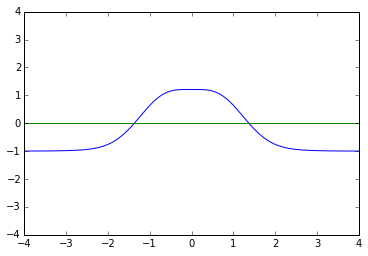

In [193]:
v=arange(-4,4+0.01,0.01)
xlim([-4,4])
ylim([-4,4])
plot(v,f2(1,v))
plot(v,0*v)
show()

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

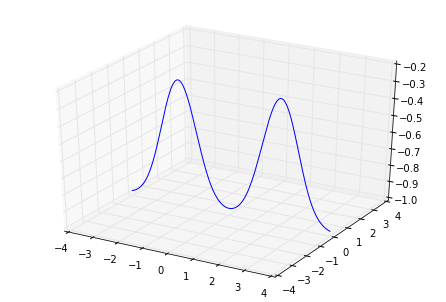

In [96]:
fig = plt.figure()
ax = Axes3D(fig)

y=arange(-4,4+0.001,0.001)
#x=zeros(len(y))

xlim([-4,4])
ylim([-4,4])

ax.plot(y,x,f2(x,y))
#ax.plot(y,x,0)

#for i in xrange(len(x)-1):
 #   ax.plot(x[i],y,f2(x[i],y))
plt.show()

In [48]:
y=arange(-4,4+1,1)
print y
z=zeros((9))
print z

[-4 -3 -2 -1  0  1  2  3  4]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [ ]:
t = zeros((3,4))
print(t)
t[1,:] = [1,2,4,5]
print t

In [ ]:
a=[]
v=[1,2,5]
d=[8,9]
#c=append(a,[v],axis=0)
a.append(v)
print a
a.append(d)
print a
print a[0][1]

# Problema 3

Se tiene una pelota de masa $m$ sobre un plano inclinado a un ángulo $\alpha$= 15º, 30º y 45º:

a) Dibuje la trayectoria de la pelota si es lanzada desde el plano inclinado con una velocidad $ v_{0x},v_{0y} > 0 $ considerando que hay fricción con el aire proporcional a la velocidad.

b) Realice la misma simulación si ahora la fracción es proporcional al cuadrado de la velocidad

c) ¿Qué sucede si ahora la pelota es lanzada con velocidad inicial $v_{0x} < 0 \ $ tal que: $ \ \tan^{-1}  v_{0y} > \alpha v_{0x}$


En éste caso las ecuaciones para modelar una pelota rebotando sobre un plano inclinado con un ángulo $\alpha$ son:

$$
m\ddot{\vec{a}} = -g \sin(\alpha) \hat{j} -f g \sin(\alpha) \dot{\vec{x}}
$$

con 
$$ 
\dot{\vec{x}}=u \dot{\vec{u}}=-\frac{g}{m} \hat{j} -\frac{f}{m}\hat{u}
$$

Y proponemos como modelos de fricción:

$$ 
f_1 \varpropto \dot{\vec{x}} \\  f_2 \varpropto \vert\dot{\vec{x}}\vert^2 
$$

Y entonces, las $f's$ serán:

$$ 
f_1 = \gamma \ \vert \vec{u} \ \vert \\ f_2 = \mu \ \vert\vec{u} \ \vert^2
$$